In [21]:
## Import packages

import os # something very general

import matplotlib.pyplot as plt     #for plotting
from matplotlib.cm import get_cmap

import cartopy.crs as crs    #for geography maps
from cartopy.feature import NaturalEarthFeature

from netCDF4 import Dataset   #netCDF4 library and wrf-python
from wrf import (getvar, ALL_TIMES, latlon_coords, CoordPair, ll_to_xy,to_xy_coords)



import xarray as xr

In [22]:
## Define my own custom filepath, from where I should ingest wrf data
myPath   = r'/home/olddog/Documents/Python_Scipts/WRF_nesting_prediction_Web/dataTest'
filename = 'wrfout_d03_2022-05-07_01:00:00'
## Read in the file
ncfile = Dataset(os.path.join(myPath, filename))

In [51]:
P =  [
     [32.85540  , 34.95063  , 'Troodos'] #33.09024,35.097565
     ]


In [52]:
start_point = CoordPair(lat =P[0][1],lon=P[0][0])

i = to_xy_coords(start_point, ncfile, timeidx=0).x
j = to_xy_coords(start_point, ncfile, timeidx=0).y

In [74]:
varname = 'soila'
station = getvar(ncfile, varname, timeidx=ALL_TIMES).isel(south_north = j, west_east = i)

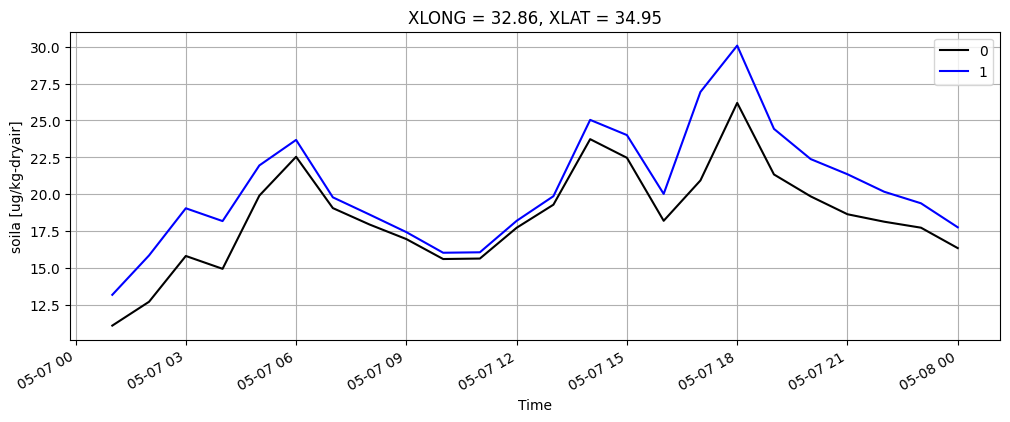

In [76]:
levels = [0,1]
axs = station.sel(bottom_top=levels).plot(figsize=(12,4), hue = 'bottom_top',label =levels)
axs[0].set_color("black")
axs[1].set_color("blue")
plt.legend()
plt.grid()